# Introduction to the Gaussian process regression 
## Solusion to the Practice ploblem


Course
- SURF 2016

Lecturer :
- Georgios Karagiannis, Department of Mathematics, Purdue

July 8, 2016

Objective :

- We wish to build a Gaussian Process regression --a probabilistic surrogate model-- in order to be able to emulate the output of the Piston Simulator, with respect to specified inputs.

Related material:

    Readings :
    
    - Rasmussen, Carl Edward. "Gaussian processes in machine learning." In Advanced lectures on machine learning, pp. 63-71. Springer Berlin Heidelberg, 2004. 	
        - see http://www.GaussianProcess.org/gpml
        - Chapters: 2, 4, 5.1, & 5.4.2

    - Slides provided
    
    Software :
    
    - R-cran (https://cran.r-project.org/)
    - R packages 
        - DiceKrigin (https://cran.r-project.org/web/packages/DiceKriging/index.html)
        - lhs (https://cran.r-project.org/web/packages/lhs/index.html)
    - Roustant, Olivier, David Ginsbourger, and Yves Deville. "DiceKriging, DiceOptim: Two R packages for the analysis of computer experiments by kriging-based metamodeling and optimization." (2012).
        - Plus dependences ...

# Catalytic Conversion of Nitrate to Nitrogen model

## Example: Catalytic Conversion of Nitrate to Nitrogen

This is Example 3.1 of [Tsilifis, Panagiotis, Ilias Bilionis, Ioannis Katsounaros, and Nicholas Zabaras. "Variational Reformulation of Bayesian Inverse Problems." arXiv preprint arXiv:1410.5522 (2014)].

Consider the catalytic
conversion of nitrate ($\mbox{NO}_3^-$) to nitrogen ($\mbox{N}_2$) and other
by-products by electrochemical means.
The mechanism that is followed is complex and not well understood.
The experiment of \cite{katsounaros} confirmed the
production of nitrogen ($\mbox{N}_2$), ammonia
($\mbox{NH}_3$), and nitrous oxide ($\mbox{N}_2\mbox{O}$) as final products
of the reaction, as well as the intermediate production of nitrite ($\mbox{NO}_2^-$).
The time is measured in minutes and the conentrations are measured in $\mbox{mmol}\cdot\mbox{L}^{-1}$.
Let's load the data into this notebook using the [Pandas](http://pandas.pydata.org) Python module:


This inconsistency suggests the existence of an intermediate unobserved reaction product X.
[Katsounaros, Ioannis, Maria Dortsiou, Christos Polatides, Simon Preston, Theodore Kypraios, and Georgios Kyriacou. "Reaction pathways in the electrochemical reduction of nitrate on tin." Electrochimica Acta 71 (2012): 270-276.] suggested that the following reaction path shown in the following figure.


![](./plots/scheme.png "Reaction Scheme")

The dynamical system associated with the reaction is:
$$
\begin{array}{cc}
\frac{d \left[\mbox{NO}_3^-\right]}{dt} &= -k_1\left[\mbox{NO}_3^-\right], \\
\frac{d\left[\mbox{NO}_2^-\right]}{dt} &= k_1\left[\mbox{NO}_3^-\right] - (k_2 + k_4 +
k_5)[\mbox{NO}_2^-], \\
\frac{d \left[\mbox{X}\right]}{dt} &= k_2 \left[\mbox{NO}_2^-\right] - k_3 [X],\\
\frac{d \left[\mbox{N}_2\right]}{dt} &= k_3 \left[\mbox{X}\right], \\
\frac{d \left[\mbox{NH}_3\right]}{dt} &= k_4 \left[\mbox{NO}_2^-\right],\\
\frac{d \left[\mbox{N}_2O\right]}{dt} &= k_5 \left[\mbox{NO}_2^-\right],
\end{array}
$$
where $[\cdot]$ denotes the concentration of a quantity, and
$k_i > 0$, $i=1,...5$ are the *kinetic rate constants*.

### Computational Model

We will develop a generic computational model for the solution of dynamical systems and we will use it to study the catalysis problem. The code relies on the [Fourth-order Runge-Kutta method](https://en.wikipedia.org/wiki/Runge–Kutta_methods) and is a modified copy of [http://www.math-cs.gordon.edu/courses/ma342/python/diffeq.py](http://www.math-cs.gordon.edu/courses/ma342/python/diffeq.py) developed by Jonathan Senning. The code solves:

$$
\begin{array}{ccc}
\dot{\mathbf{y}} &=& f(\mathbf{y}, t),\\
\mathbf{y}(0) &=& \mathbf{y}_0.
\end{array}
$$

The input values are:

| Variable | Value |
|---------|------------------|
| $\xi_1$ |$1.35\pm 0.05$ |
| $\xi_2$ |$1.65\pm 0.08$   |
| $\xi_3$ |$1.34\pm 0.11$ |
| $\xi_4$ |$-0.16\pm 0.16$ |
| $\xi_5$ |$-3.84\pm 0.20$ |


The output values of the simulator are the concentrations (in $\mbox{mmol}\cdot\mbox{L}^{-1}$) of $\mbox{NO}_3^-$, $\mbox{NO}_2^-$, X ( unobserved reaction product),  $\mbox{N}_2$, $\mbox{NH}_3$, $\mbox{N}_2\mbox{O}$, and $\mbox{NO}_2^-$.

The R code in './catalytic.R' provides a simulator that returns only one output value (selected by the user), given the values of the 5 inputs.


Tsilifis, Panagiotis, Ilias Bilionis, Ioannis Katsounaros, and Nicholas Zabaras. "Variational Reformulation of Bayesian Inverse Problems." arXiv preprint arXiv:1410.5522 (2014)


## Software preparation

In [1]:
# DOWNLOAD THE R PACKAGES REQUIRED
install.packages('DiceKriging', repos = "http://cran.us.r-project.org")
install.packages('lhs', repos = "http://cran.us.r-project.org")
# install.packages('tcltk', repos = "http://cran.us.r-project.org")
# install.packages('aplpack', repos = "http://cran.us.r-project.org")

Installing package into ‘/export/users/gkaragia/R/x86_64-redhat-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
Warning message:
In install.packages("DiceKriging", repos = "http://cran.us.r-project.org"): installation of package ‘DiceKriging’ had non-zero exit statusInstalling package into ‘/export/users/gkaragia/R/x86_64-redhat-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
Warning message:
In install.packages("lhs", repos = "http://cran.us.r-project.org"): installation of package ‘lhs’ had non-zero exit status

In [2]:
# LOAD THE R PACKAGES REQUIRED
library('lhs')
library('DiceKriging')
# library('tcltk')
# library('aplpack')

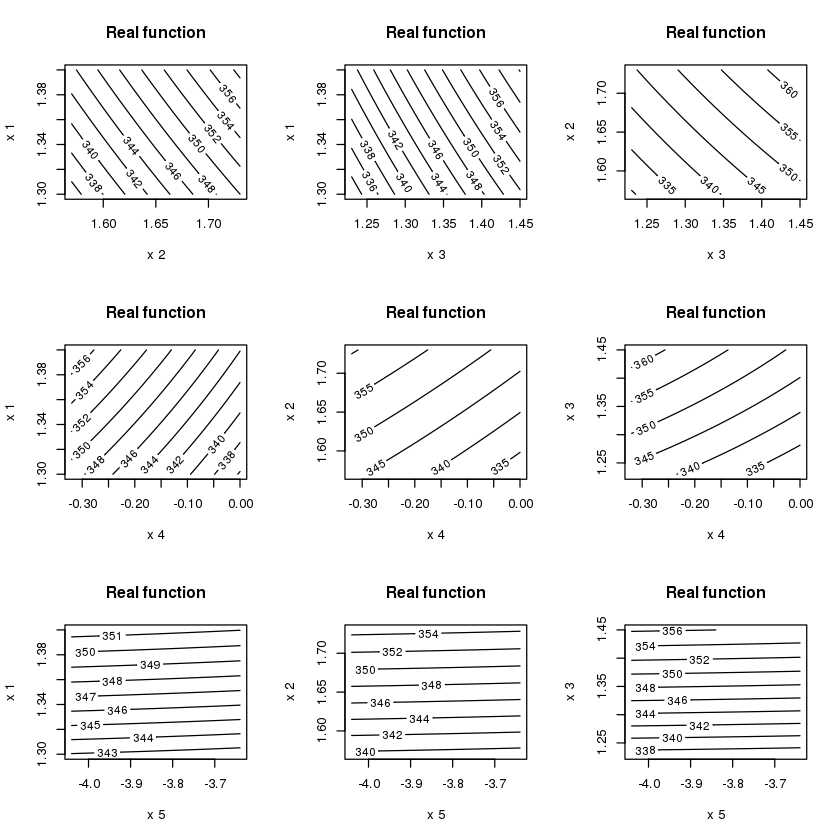

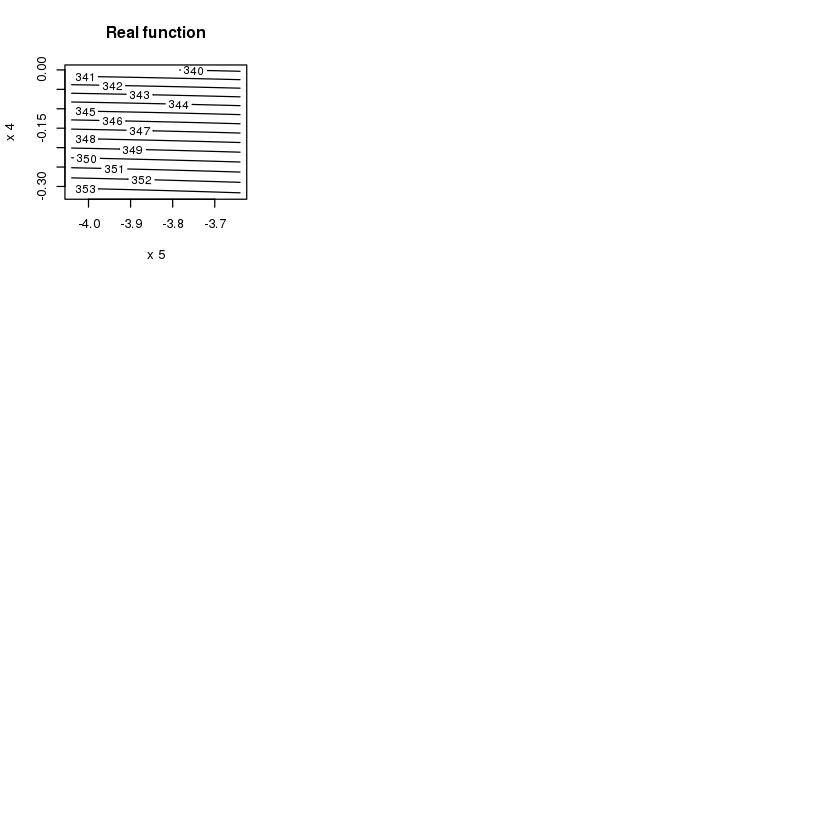

In [3]:
# THIS IS THE SIMULATOR AND THE MIN AND MAX OF THE INPUTS

source("./catalytic.R") # function: output_1d <- simulator(input_5d, jout=4)
input_min <- c(1.30,  1.57,  1.23, -0.32, -4.04)
input_max <- c(1.40,  1.73,  1.45,  0.00, -3.64)
input_d <- length(input_min)

# par(mfrow=c(2,3))
# for (i in 1:6) {
#     n_data <- 500 ;
#     n_dim <- input_d
#     X_data <- t(input_min + (input_max-input_min)*t(matrix(runif(n_data*n_dim),n_data, n_dim))) ;
#     myfun <-function(xi){ return(simulator(xi,i))}
#     Y_data <- apply(X_data, 1, myfun) ;
#     hist(Y_data)
# }

myfun <- function(xx) {return(simulator(xx, jout=4)) }

# PLOT THE REAL FUNCTION TO SEE HOW IT LOOKS LIKE

par(mfrow = c(3,3))
for (i in 1:input_d) {
    for ( j in 1:input_d ) 
        if(i>j) {
        n.grid <- 100 ;
        x1.grid <-seq(input_min[i],input_max[i],length.out=n.grid) ;
        x2.grid <-seq(input_min[j],input_max[j],length.out=n.grid) ;
        X.grid <- expand.grid( x1=x1.grid,  x2=x2.grid )
        myfun2d<-function(xx){ 
                            zz<-0.5*(input_min+input_max) ; 
                            zz[i]<-xx[1]; zz[j]<-xx[2]; 
                            return(myfun(zz)) 
                    }
        y.grid <- apply(X.grid,1,myfun2d)
    contour(x1.grid, x2.grid, matrix(y.grid, n.grid, n.grid), 10, 
            main = "Real function", 
            xlab = paste("x", as.character(i)), 
            ylab = paste("x", as.character(j)),
            xlim = c(input_min[i],input_max[i]), 
            ylim = c(input_min[j],input_max[j]))
    }
}

## Generate a training data-set

Generate a training data-set $D={(x_i,y_i);i=1,...,n}$  of size $n=20$ via a LHS.

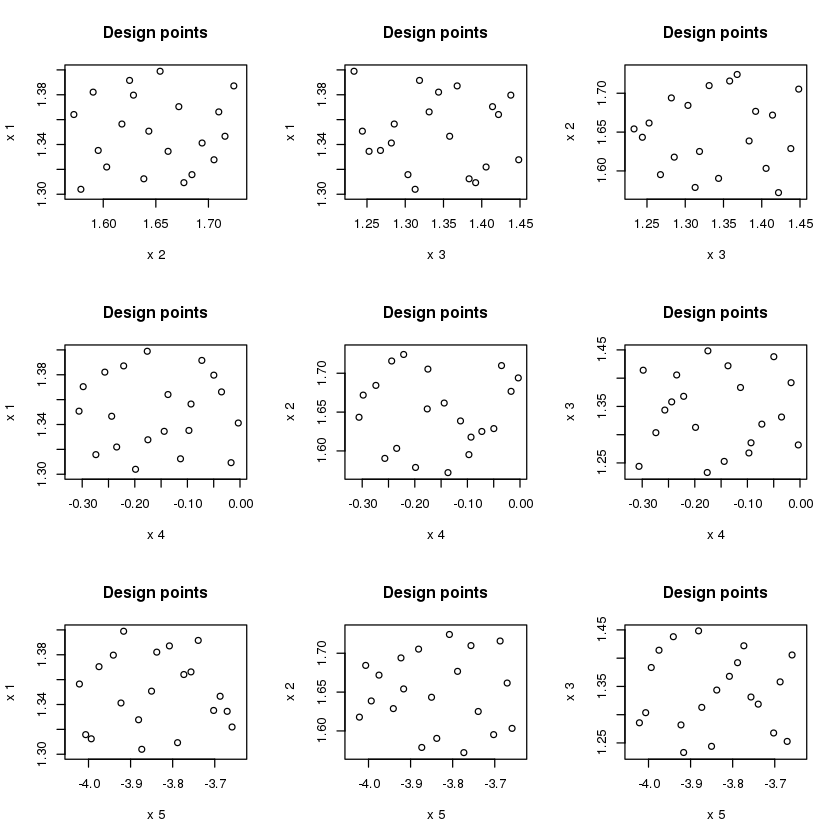

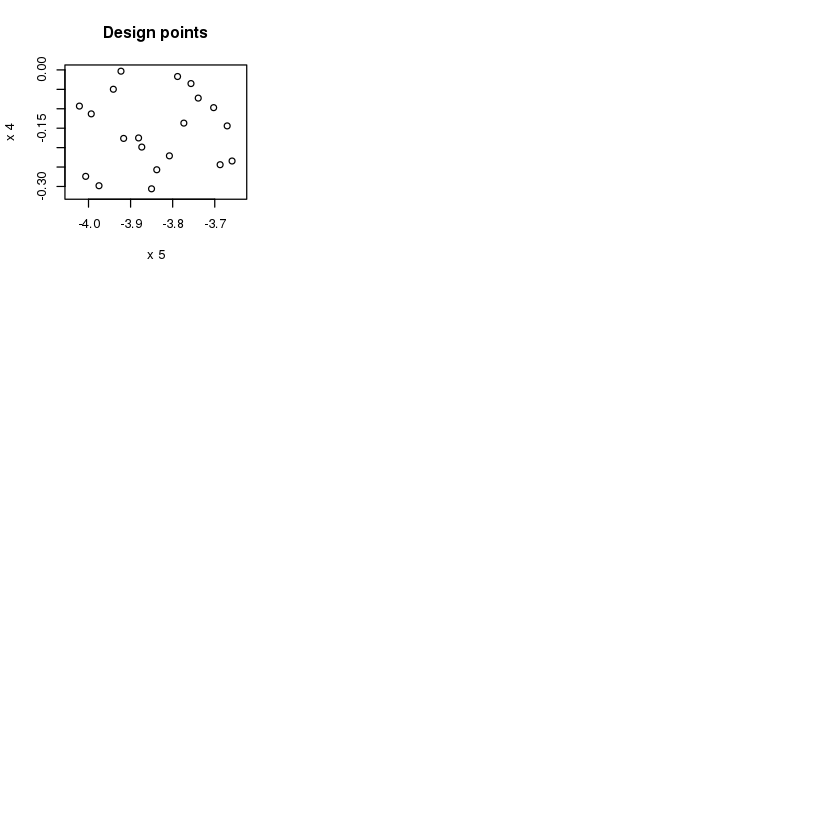

In [4]:
# GENERATE THE TRAINING DATA SET
n_data <- 20 ;
n_dim <- length(input_min)
X_data <- t(input_min + (input_max-input_min)*t(optimumLHS(n=n_data, k=n_dim))) ;
Y_data <- apply(X_data, 1, myfun) ;

# PLOT THE INPUT POINT TO SEE THE SPREAD
par(mfrow = c(3,3))
for (i in 1:n_dim) 
    for ( j in 1:n_dim ) 
        if(i>j) {
            plot(X_data[,i], X_data[,j], 
                main = "Design points", 
                xlab = paste("x", as.character(i)), 
                ylab = paste("x", as.character(j)) ,
                xlim = c(input_min[i],input_max[i]), 
                ylim = c(input_min[j],input_max[j])
                    )
            }

## Compare different GP regression models

Use the diagnostics we leant, and compare Gaussian process regression models deffering on the prior linear trend structure or the covariance function

In [6]:
# Diagnostics (Feel free to use others that you know)

R2 <-function (Y, Ypred) {
    Ypred <- as.numeric(Ypred)
    Y <- as.numeric(Y)
    return(1 - mean((Y - Ypred)^2)/mean((Y - mean(Y))^2))
}

RMSE <- function (Y, Ypred)  {
    Ypred <- as.numeric(Ypred)
    Y <- as.numeric(Y)
    return(sqrt(mean((Y - Ypred)^2)))
}

MAE <- function (Y, Ypred)  {
    Ypred <- as.numeric(Ypred) 
    Y <- as.numeric(Y)
    return(mean(abs(Y - Ypred)))
}

In [7]:
# Train different GP regressions differing on the covariance function

myfun_km_matern5_2 <- km( formula = ~ 1 , # linear trend formula; E.G.: "formula = ~ 1 +x1 +exp(x2) +I(x1*x2) +I(x1^2)"
                design = data.frame(x1=X_data[,1], 
                                    x2=X_data[,2], 
                                    x3=X_data[,3], 
                                    x4=X_data[,4], 
                                    x5=X_data[,5]), # a data frame representing the design of experiments.
                response=Y_data,                    # the values of the 1-dimensional outpu 
                covtype="matern5_2",                # covariance structure 
                coef.trend = NULL,                  # values for the trend parameters
                coef.cov = NULL,                    # values for the covariance parameters
                coef.var = NULL,                    # values for the variance parameters
                nugget= 1e-7,                       # the homogeneous nugget effect
                noise.var = NULL,                   # containing the noise variance at each observation
                optim.method = "BFGS",              # optimization method is chosen for the likelihood maximization.
                lower = NULL,                       # lower bounds of the correlation parameters for optimization
                upper = NULL,                       # upper bounds of the correlation parameters for optimizati
                control =list(trace=FALSE),         # =list(trace=FALSE) to supress optimization trace information
                kernel=NULL)                        # a user's new covariance structure

myfun_km_matern3_2  <- km( formula = ~ 1 , # linear trend formula; E.G.: "formula = ~ 1 +x1 +exp(x2) +I(x1*x2) +I(x1^2)"
                design = data.frame(x1=X_data[,1], 
                                    x2=X_data[,2], 
                                    x3=X_data[,3], 
                                    x4=X_data[,4], 
                                    x5=X_data[,5]), # a data frame representing the design of experiments.
                response=Y_data,                    # the values of the 1-dimensional outpu 
                covtype="matern3_2",                # covariance structure 
                coef.trend = NULL,                  # values for the trend parameters
                coef.cov = NULL,                    # values for the covariance parameters
                coef.var = NULL,                    # values for the variance parameters
                nugget= 1e-7,                       # the homogeneous nugget effect
                noise.var = NULL,                   # containing the noise variance at each observation
                optim.method = "BFGS",              # optimization method is chosen for the likelihood maximization.
                lower = NULL,                       # lower bounds of the correlation parameters for optimization
                upper = NULL,                       # upper bounds of the correlation parameters for optimizati
                control =list(trace=FALSE),         # =list(trace=FALSE) to supress optimization trace information
                kernel=NULL)  

myfun_km_gauss <- km( formula = ~ 1 ,        # linear trend formula; E.G.: "formula = ~ 1 +x1 +exp(x2) +I(x1*x2) +I(x1^2)"
                design = data.frame(x1=X_data[,1], 
                                    x2=X_data[,2], 
                                    x3=X_data[,3], 
                                    x4=X_data[,4], 
                                    x5=X_data[,5]), # a data frame representing the design of experiments.
                response=Y_data,                    # the values of the 1-dimensional outpu 
                covtype="gauss",                    # covariance structure 
                coef.trend = NULL,                  # values for the trend parameters
                coef.cov = NULL,                    # values for the covariance parameters
                coef.var = NULL,                    # values for the variance parameters
                nugget= 1e-7,                       # the homogeneous nugget effect
                noise.var = NULL,                   # containing the noise variance at each observation
                optim.method = "BFGS",              # optimization method is chosen for the likelihood maximization.
                lower = NULL,                       # lower bounds of the correlation parameters for optimization
                upper = NULL,                       # upper bounds of the correlation parameters for optimizati
                control =list(trace=FALSE),         # =list(trace=FALSE) to supress optimization trace information
                kernel=NULL)                        # a user's new covariance structure

myfun_km_exp <- km( formula = ~ 1 , # linear trend formula; E.G.: "formula = ~ 1 +x1 +exp(x2) +I(x1*x2) +I(x1^2)"
                design = data.frame(x1=X_data[,1], 
                                    x2=X_data[,2], 
                                    x3=X_data[,3], 
                                    x4=X_data[,4], 
                                    x5=X_data[,5]), # a data frame representing the design of experiments.
                response=Y_data,                    # the values of the 1-dimensional outpu 
                covtype="exp",                      # covariance structure 
                coef.trend = NULL,                  # values for the trend parameters
                coef.cov = NULL,                    # values for the covariance parameters
                coef.var = NULL,                    # values for the variance parameters
                nugget= 1e-7,                       # the homogeneous nugget effect
                noise.var = NULL,                   # containing the noise variance at each observation
                optim.method = "BFGS",              # optimization method is chosen for the likelihood maximization.
                lower = NULL,                       # lower bounds of the correlation parameters for optimization
                upper = NULL,                       # upper bounds of the correlation parameters for optimizati
                control =list(trace=FALSE),         # =list(trace=FALSE) to supress optimization trace information
                kernel=NULL)                        # a user's new covariance structure

# CROSS VALIDATION CRITERIA
Y_pred <- leaveOneOut.km(myfun_km_matern5_2, "UK")$mean
CV_matern5_2 <-data.frame( R2 = R2(Y_data, Y_pred),
                            RMSE = RMSE(Y_data, Y_pred),
                            MAE = MAE(Y_data, Y_pred), row.names="matern5_2")


Y_pred <- leaveOneOut.km(myfun_km_matern3_2, "UK")$mean
CV_matern3_2 <-data.frame( R2 = R2(Y_data, Y_pred),
                            RMSE = RMSE(Y_data, Y_pred),
                            MAE = MAE(Y_data, Y_pred), row.names="matern3_2")

Y_pred <- leaveOneOut.km(myfun_km_gauss, "UK")$mean
CV_gauss <-data.frame( R2 = R2(Y_data, Y_pred),
                            RMSE = RMSE(Y_data, Y_pred),
                            MAE = MAE(Y_data, Y_pred), row.names="gauss~~~~")

Y_pred <- leaveOneOut.km(myfun_km_exp, "UK")$mean
CV_exp <-data.frame( R2 = R2(Y_data, Y_pred),
                            RMSE = RMSE(Y_data, Y_pred),
                            MAE = MAE(Y_data, Y_pred), row.names="exp~~~~~~")


# PRINT THE RESULTS TO COMPARE

CV_matern5_2
CV_matern3_2
CV_gauss
CV_exp

,R2,RMSE,MAE
matern5_2,0.9968184,0.4775566,0.3994776


,R2,RMSE,MAE
matern3_2,0.9898827,0.8515930,0.6707592


,R2,RMSE,MAE
gauss~~~~,0.9991021,0.2536943,0.2145921


,R2,RMSE,MAE
exp~~~~~~,0.820581,3.586203,2.716572


## Choose the 'Best' model

In [8]:
# SELECT THE BEST GAUSSIAN PROCESS

myfun_km <- myfun_km_gauss

## Check the validity of the chossen 'Best' model

,R2,RMSE,MAE
1,0.9991021,0.2536943,0.2145921


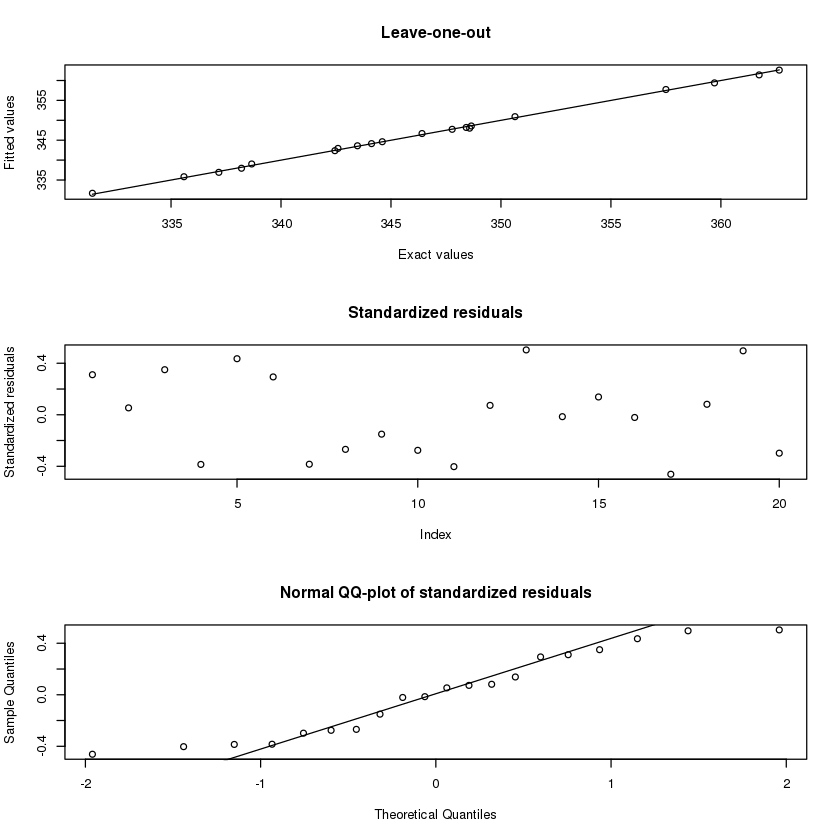

In [9]:
# CROSS VALIDATION CRITERIA
Y_pred <- leaveOneOut.km(myfun_km, "UK")$mean
data.frame(
    R2 = R2(Y_data, Y_pred),
    RMSE = RMSE(Y_data, Y_pred),
    MAE = MAE(Y_data, Y_pred))

# PLOT DIAGNOSTICS
plot(myfun_km)

## Print the estimates of the hyperparameters

In [10]:
# PRINT THE PARAMETERS

show(myfun_km)


Call:
km(formula = ~1, design = data.frame(x1 = X_data[, 1], x2 = X_data[, 
    2], x3 = X_data[, 3], x4 = X_data[, 4], x5 = X_data[, 5]), 
    response = Y_data, covtype = "gauss", coef.trend = NULL, 
    coef.cov = NULL, coef.var = NULL, nugget = 1e-07, noise.var = NULL, 
    optim.method = "BFGS", lower = NULL, upper = NULL, control = list(trace = FALSE), 
    kernel = NULL)

Trend  coeff.:
               Estimate
 (Intercept)   343.8408

Covar. type  : gauss 
Covar. coeff.:
               Estimate
   theta(x1)     0.1899
   theta(x2)     0.3041
   theta(x3)     0.3530
   theta(x4)     0.6055
   theta(x5)     0.7255

Variance estimate: 153.1162

Nugget effect : 1e-07



## Plot the posterior GPR mean and variance, as well as the real function (in contour plots)

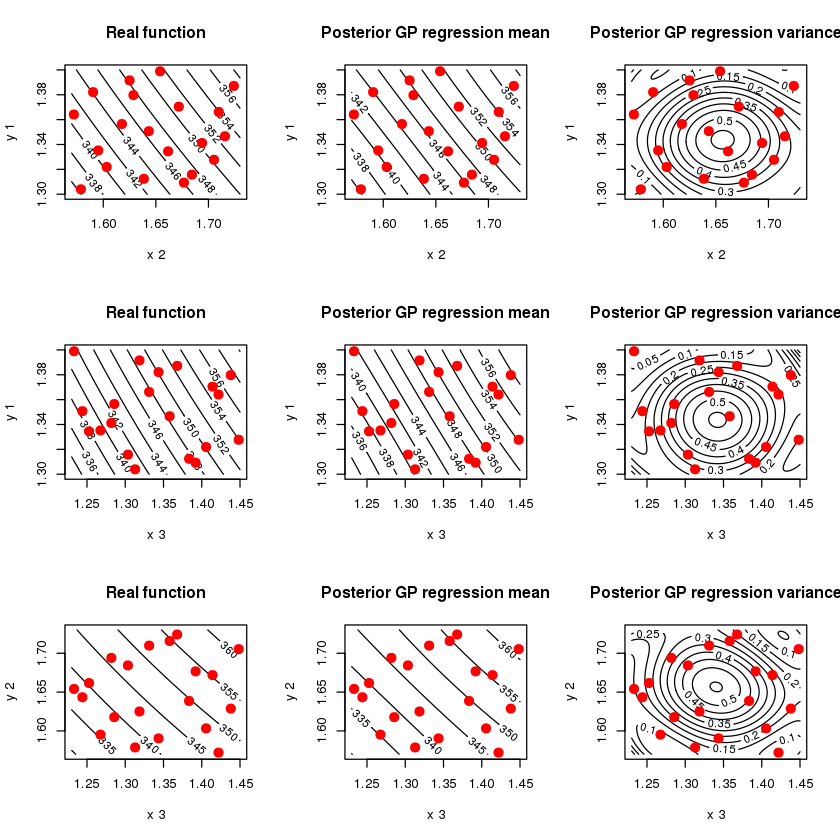

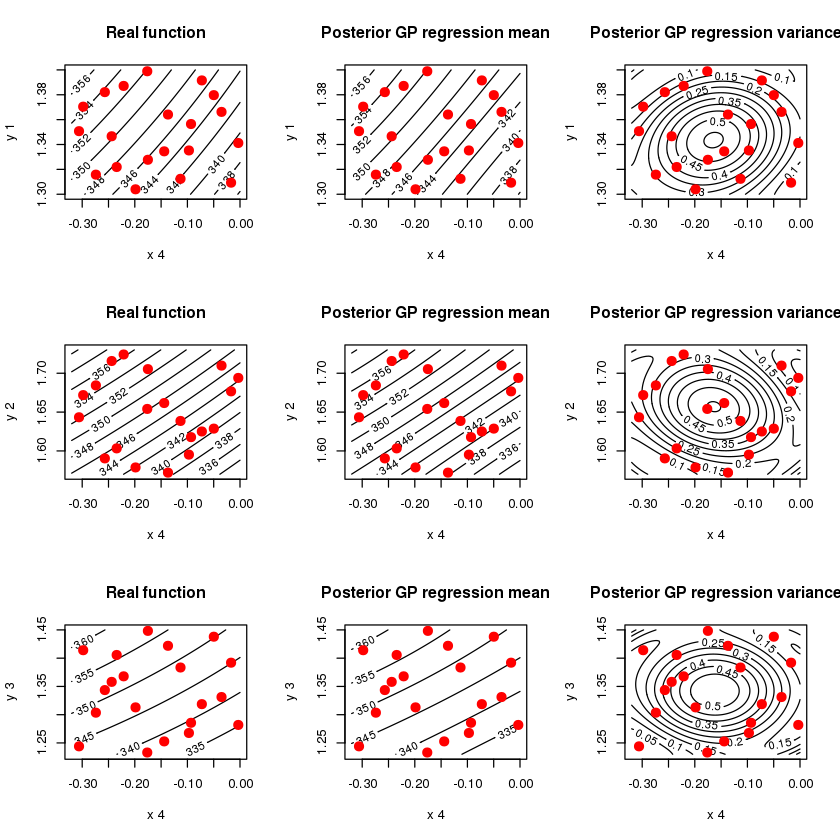

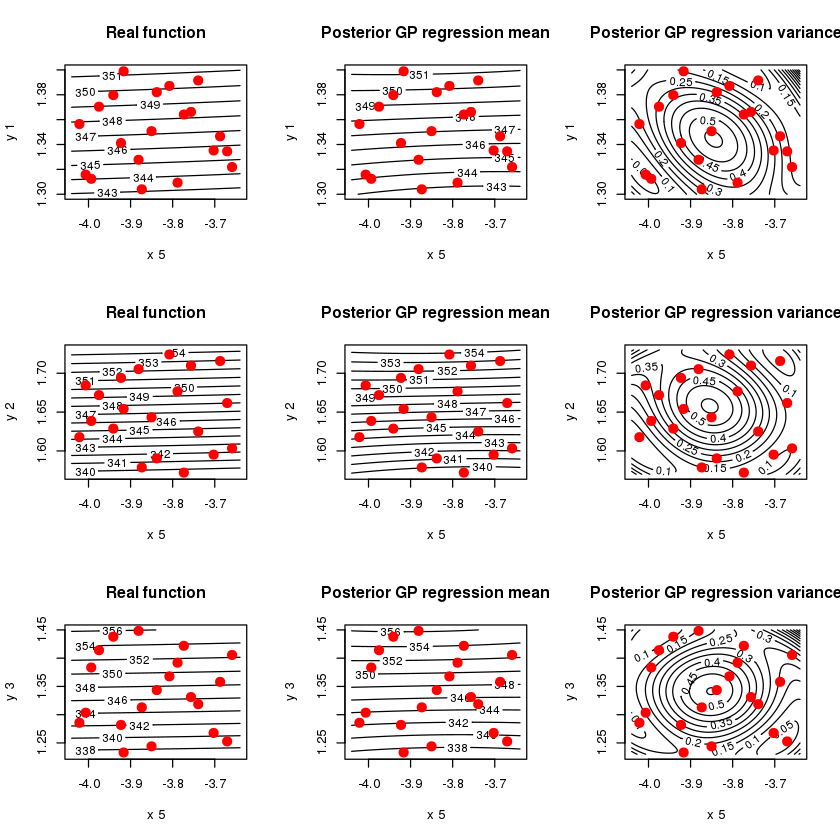

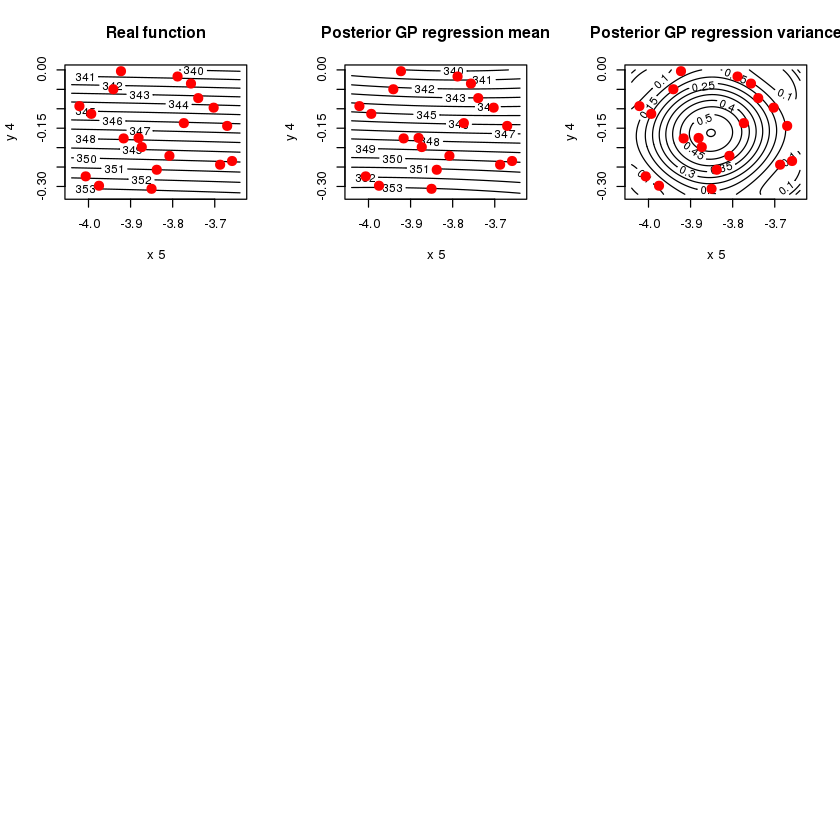

In [12]:
# PLOT THE GPR MEAN AND VARIANCE , AS WELL AS THE REAL FUNCTION

d_input <- length(input_min)

# Contour plot
par(mfrow = c(3,3))
for (i in 1:d_input) 
    for ( j in 1:d_input ) 
        if(i>j) {
            
            # GET THE GRID FOR INPUTS

            n.grid <- 100 ;
            x1.grid <-seq(input_min[i],input_max[i],length.out=n.grid) ;
            x2.grid <-seq(input_min[j],input_max[j],length.out=n.grid) ;
            X.grid <- expand.grid( x1=x1.grid,  x2=x2.grid )
            
            # COMPUTE THE REAL FUNCTION
            
            myfun_2d<-function(xx){ 
                        zz<-0.5*(input_min+input_max) ; 
                        zz[i]<-xx[1]; zz[j]<-xx[2]; 
                        return(myfun(zz)) 
            }
            y.grid <- apply(X.grid, 1, myfun_2d)
            
            contour(x1.grid, x2.grid, matrix(y.grid, n.grid, n.grid), 11, 
                    main = "Real function", 
                    xlab=paste("x", as.character(i)), ylab=paste("y", as.character(j)))
            points(X_data[ , i], X_data[ , j], pch = 19, cex = 1.5, col = "red")  
            
            # COMPUTE THE GPR MEAN
            
            myfun_km_pred_2d_mean<-function(xx){ 
                                zz<-0.5*(input_min+input_max) ; 
                                zz[i]<-xx[1]; zz[j]<-xx[2]; 
                                return( predict(myfun_km, t(matrix(zz)), "UK", checkNames=FALSE)$mean ) 
            }
            y.pred.grid_mean <- apply(X.grid, 1, myfun_km_pred_2d_mean)  
            
            contour(x1.grid, x2.grid, matrix(y.pred.grid_mean, n.grid, n.grid), 11, 
                    main = "Posterior GP regression mean",
                    xlab=paste("x", as.character(i)), ylab=paste("y", as.character(j)))
            points(X_data[ , i], X_data[ , j], pch = 19, cex = 1.5, col = "red") 
            
            # COMPUTE THE GPR VARIANCE
            
            myfun_km_pred_2d_sd<-function(xx){ 
                                zz<-0.5*(input_min+input_max) ; 
                                zz[i]<-xx[1]; zz[j]<-xx[2]; 
                                return( predict(myfun_km, t(matrix(zz)), "UK", checkNames=FALSE)$sd ) 
            }
            y.pred.grid_sd <- apply(X.grid, 1, myfun_km_pred_2d_sd)          

            contour(x1.grid, x2.grid, matrix(y.pred.grid_sd^2, n.grid, n.grid), 15, 
                    main = "Posterior GP regression variance", 
                    xlab=paste("x", as.character(i)), ylab=paste("y", as.character(j)))
            points(X_data[ , i], X_data[ , j], pch = 19, cex = 1.5, col = "red")

            }